In [1]:
### 2019-12-18 at Office


import torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from  torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision.models as models
#import lenstronomy.Util.image_util as image_util
import os, sys
import h5py
import pandas as pd
import numpy as np
import scipy.ndimage
from scipy.ndimage import gaussian_filter
from scipy.ndimage import rotate
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import gc
import astropy
from astropy.io import fits
from astropy.table import Table


root_folder = "/media/joshua/HDD_fun2/Public/"
loaded_model_path = './saved_model/2020-01-08criteria_resnet18.mdl'
#loaded_model_path = './saved_model/2019-12-19n_sources_resnet18.mdl'
# EHT_test_path = root_folder + test_folder
# files = os.listdir(EHT_test_path)
#loaded_model_path = './saved_model/flux_resnet18.mdl'


if os.path.exists(loaded_model_path):
    net = torch.load(loaded_model_path)
    print('loaded mdl！')
else:
    print('No model to load. Should stop!')
    
print(os.getcwd())

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
data_transform = transforms.Compose([
            transforms.ToTensor(), # scale to [0,1] and convert to tensor
            normalize,
            ])
target_transform = torch.Tensor




loaded mdl！
/home/joshua/Documents/git_work_zone/Lens_Finder


In [2]:

glo_batch_size = 1
test_num_batch = 1

class LensDataset(Dataset): # torch.utils.data.Dataset
    def __init__(self, root_dir, train=True, transform=None, target_transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.target_transform = target_transform
        self.train = train# training set or test set


        if self.train:
            self.path = root_dir#os.path.join(self.root_dir, self.train_folder)
            self.df = pd.read_csv(self.path + '/train.csv')

        else:
            self.path = root_dir#os.path.join(self.root_dir, self.test_folder)
            self.df = pd.read_csv(self.path + '/val.csv')

    def __getitem__(self, index):

        ID = self.df['ID'].iloc[[index]]
        n_sources = self.df['n_sources'].iloc[[index]]
        channel_names = ['EUC_H', 'EUC_J', 'EUC_Y', 'EUC_VIS']
        mag_eff = self.df['mag_eff'].iloc[[index]]
        #print("mag_eff", mag_eff.values[0])
        if mag_eff.values[0] < 1.2 or np.isnan(mag_eff.values[0]):
            criteria = 0.
        elif mag_eff.values[0] >= 2.0:
            criteria = 1.
        else:
            criteria = (mag_eff.values[0] - 1.2)/0.8

        n_source_im = self.df['n_source_im'].iloc[[index]]
        n_pix_source = self.df['n_pix_source'].iloc[[index]]
        if n_pix_source.values[0] < 20:
            criteria = 0
        if n_source_im.values[0] < 0.9:
            criteria = 0
        #print("criteria", criteria)
        #if
        #criteria = 1
        # filepath = "/media/joshua/HDD_fun2/Public/EUC_Y/imageEUC_Y-" + str(ID.values[0]) + ".fits"
        # lens_data = fits.open(filepath)
        # img = lens_data[0].data
        image = np.zeros((4, 224, 224))
        try:
            for i, channel in enumerate(channel_names):

                filepath = self.path + channel + "/image" + channel + "-" + str(ID.values[0]) + ".fits"
                lens_data = fits.open(filepath)
                img = lens_data[0].data
                img *= 10e8
                img_channel_0 = scipy.ndimage.zoom(img, 224/img.shape[0], order=1)
                image[i, :, :] += img_channel_0
        except:
            print("error", ID)
            pass



        # if self.transform is not None:
        #     image = self.transform(image)

        
        return image, ID.values[0], criteria, mag_eff.values[0]  #, n_sources.values[0]

    def __len__(self):
        return self.df.shape[0]


In [3]:
test_loader = torch.utils.data.DataLoader(LensDataset(root_folder, train=False, transform=data_transform, target_transform=target_transform),
            batch_size = glo_batch_size, shuffle = True
            )

criteria (ground truth) 0.0
criteria prediction: 0.114400074


/home/joshua/miniconda3/lib/python3.7/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


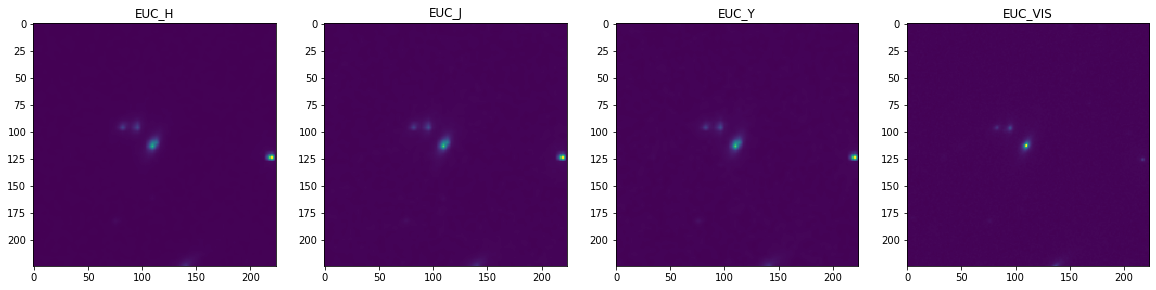

______
criteria (ground truth) 0.551525
criteria prediction: 0.21314153


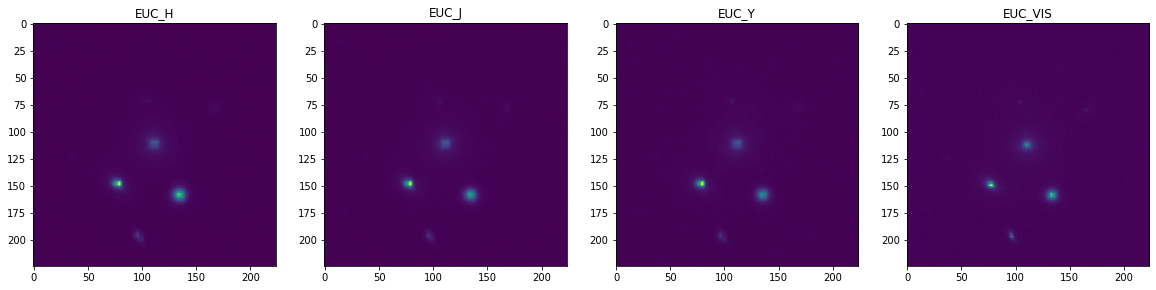

______
criteria (ground truth) 0.0
criteria prediction: 0.09809117


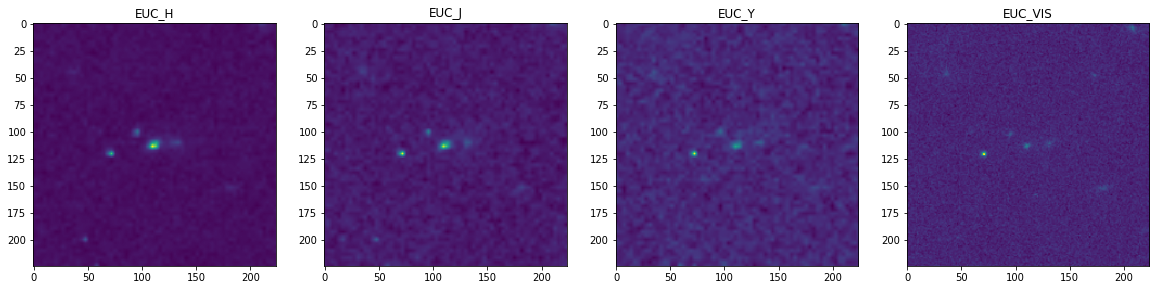

______
criteria (ground truth) 1.0
criteria prediction: 0.87183565


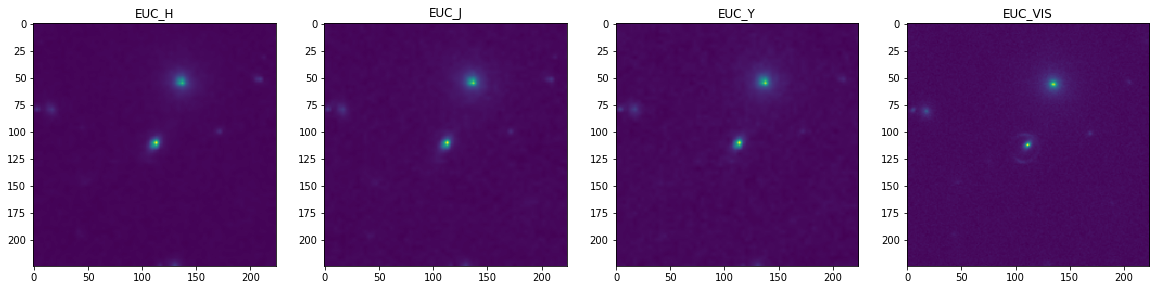

______
criteria (ground truth) 0.2157
criteria prediction: 0.44954193


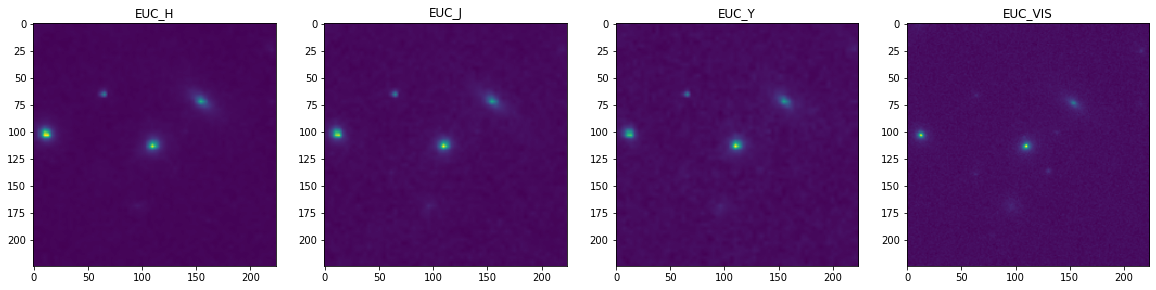

______
criteria (ground truth) 0.3580375
criteria prediction: 0.36456758


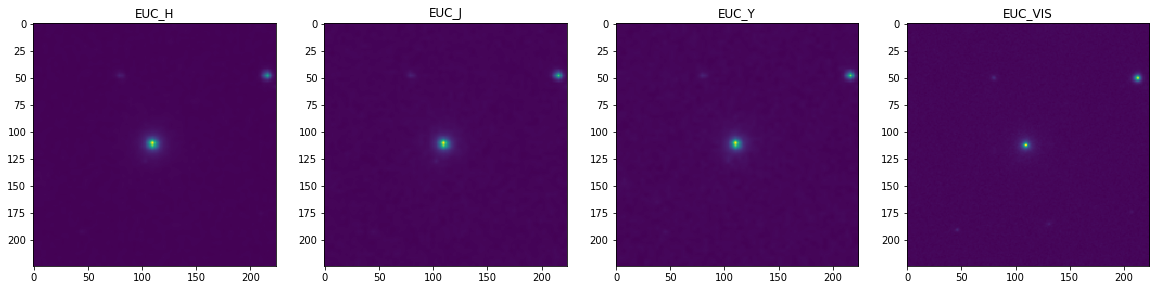

______
criteria (ground truth) 1.0
criteria prediction: 0.754998


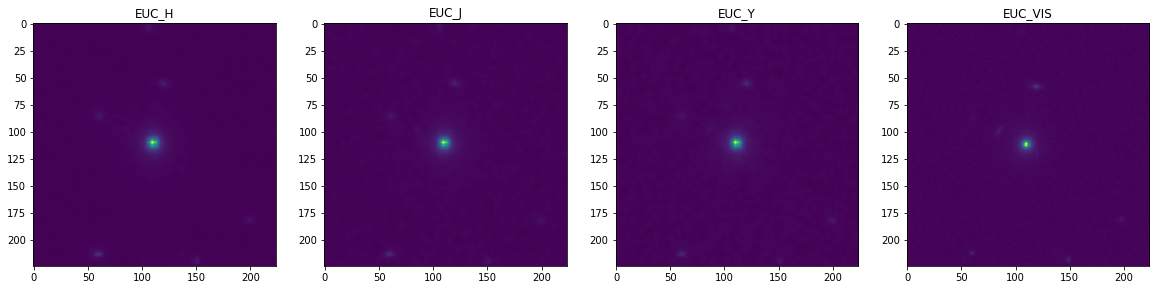

______
criteria (ground truth) 0.0
criteria prediction: 0.50512165


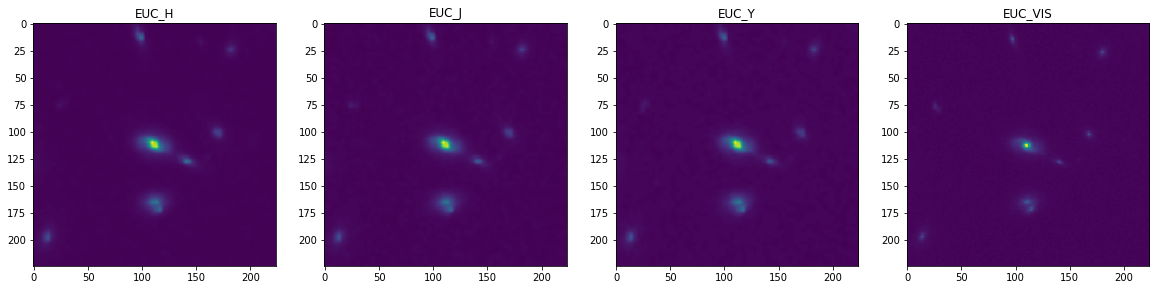

______
criteria (ground truth) 1.0
criteria prediction: 0.5907378


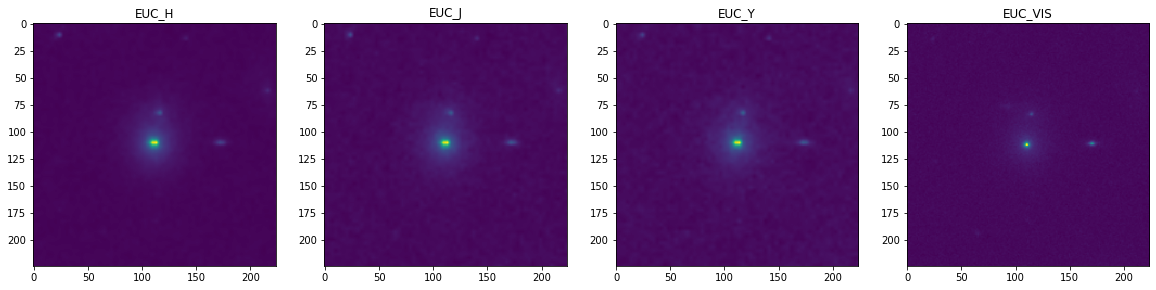

______
criteria (ground truth) 0.0
criteria prediction: 0.11373621


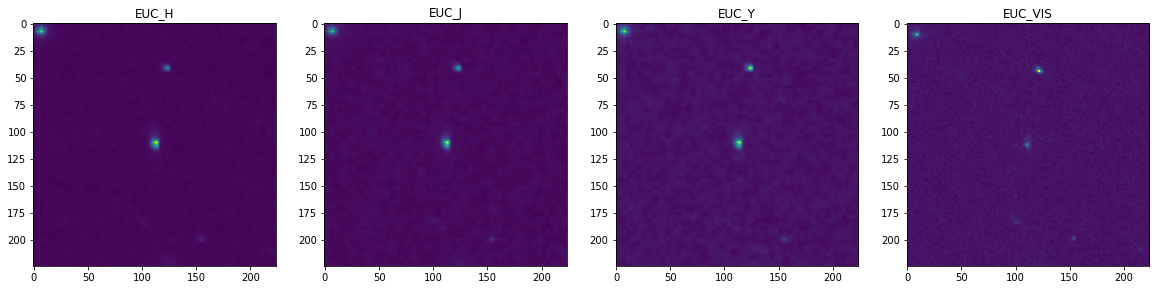

______
criteria (ground truth) 1.0
criteria prediction: 0.113023795


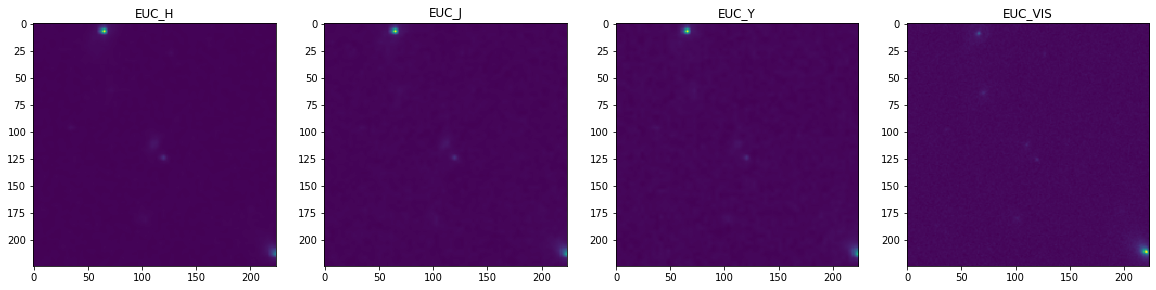

______
criteria (ground truth) 1.0
criteria prediction: 0.19463666


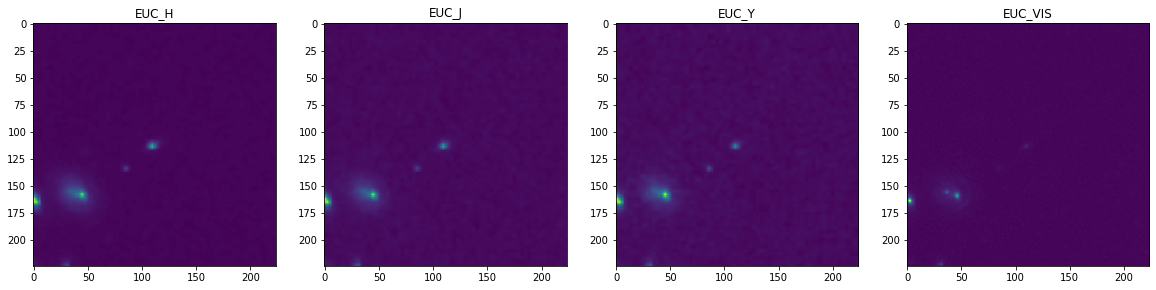

______
criteria (ground truth) 0.0
criteria prediction: 0.10164232


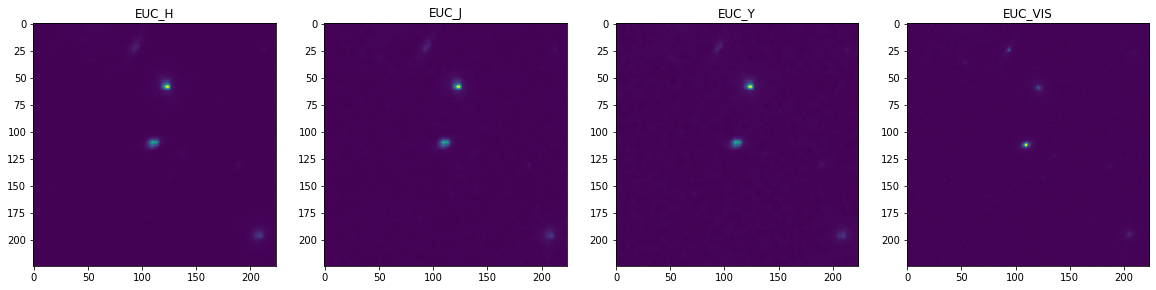

______
criteria (ground truth) 0.0
criteria prediction: 0.22707357


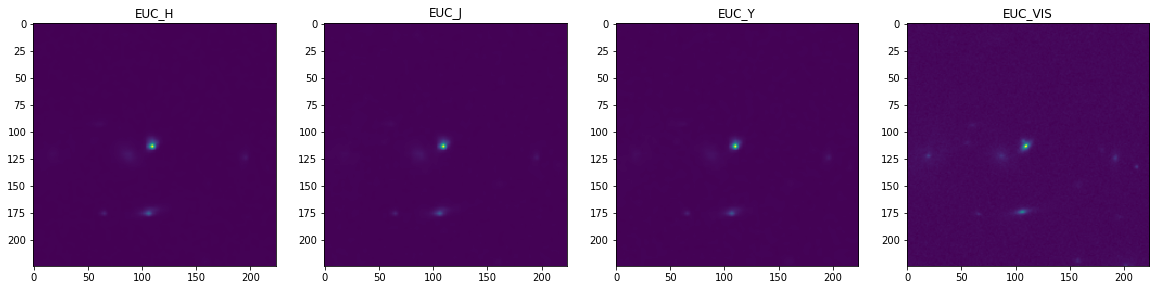

______
criteria (ground truth) 0.0
criteria prediction: 0.22189699


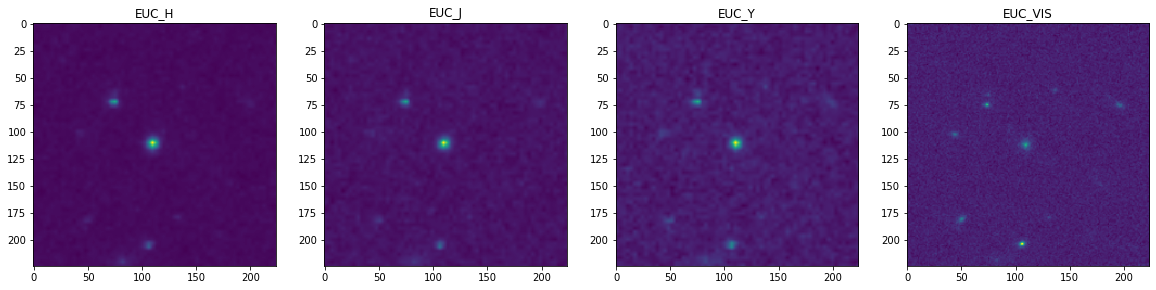

______
criteria (ground truth) 0.0
criteria prediction: 0.5355963


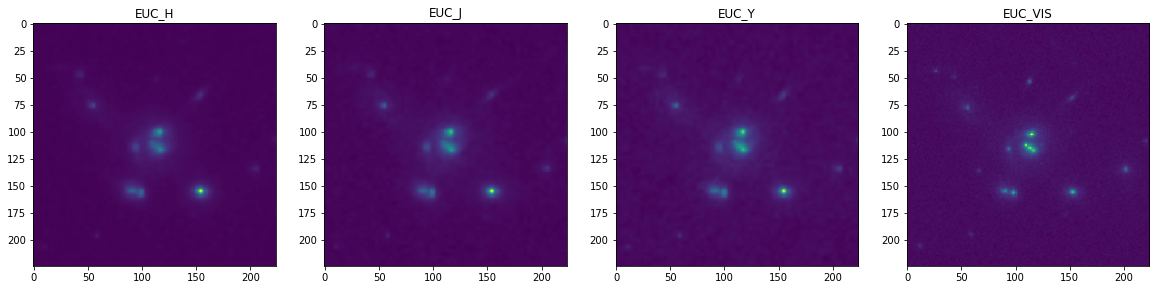

______
criteria (ground truth) 0.0
criteria prediction: 0.1539833


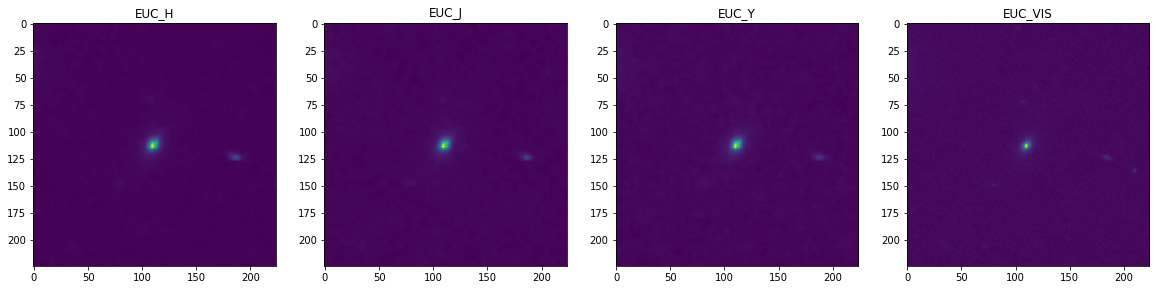

______
criteria (ground truth) 0.0
criteria prediction: 0.12389474


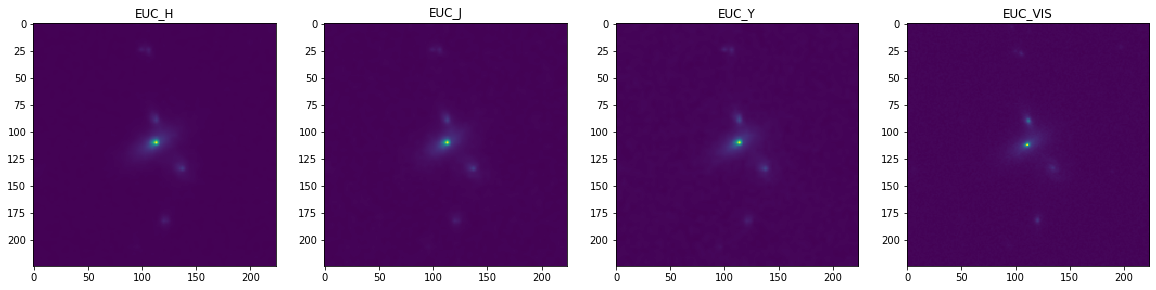

______
criteria (ground truth) 1.0
criteria prediction: 0.3022994


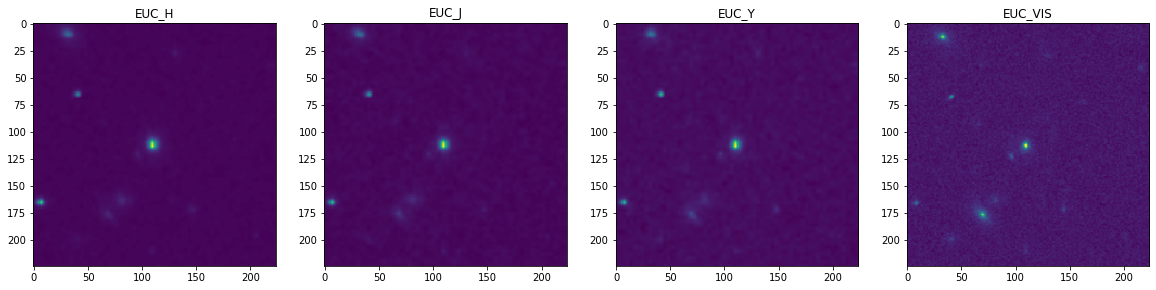

______
criteria (ground truth) 0.84515
criteria prediction: 0.7609545


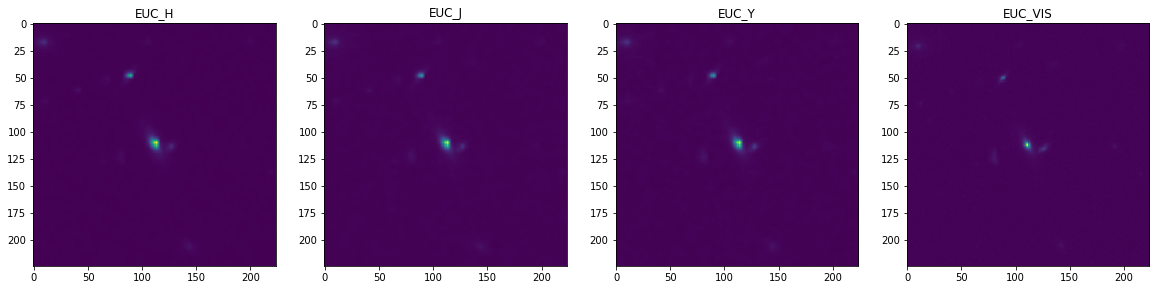

______
criteria (ground truth) 0.0
criteria prediction: 0.20518723


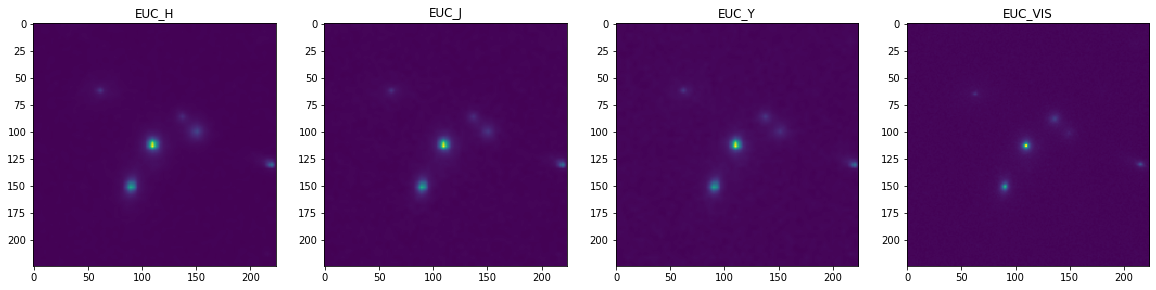

______
criteria (ground truth) 1.0
criteria prediction: 0.21577947


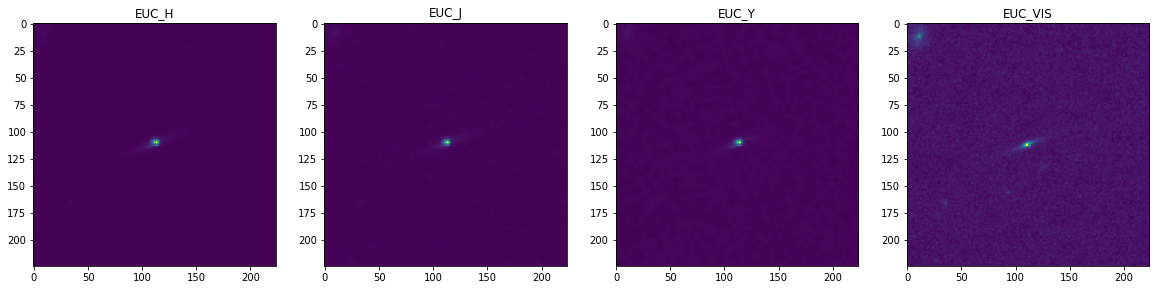

______
criteria (ground truth) 1.0
criteria prediction: 0.23230568


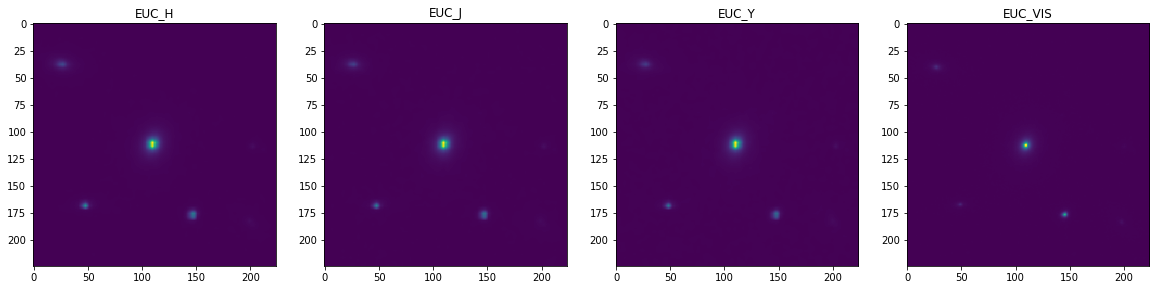

______
criteria (ground truth) 1.0
criteria prediction: 0.44060943


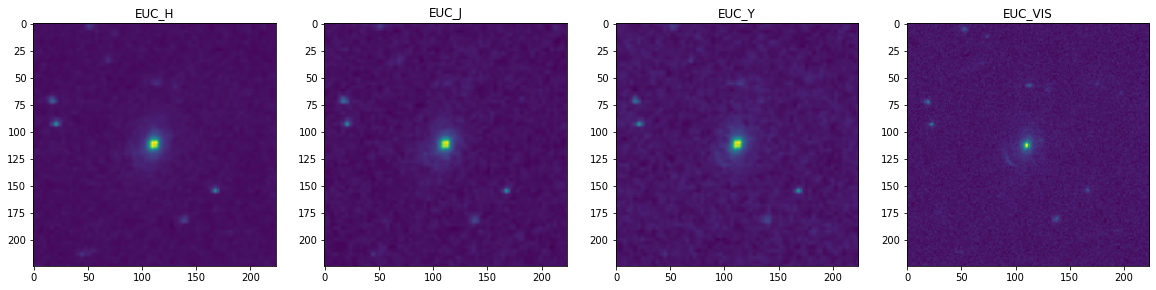

______
criteria (ground truth) 0.0
criteria prediction: 0.106648244


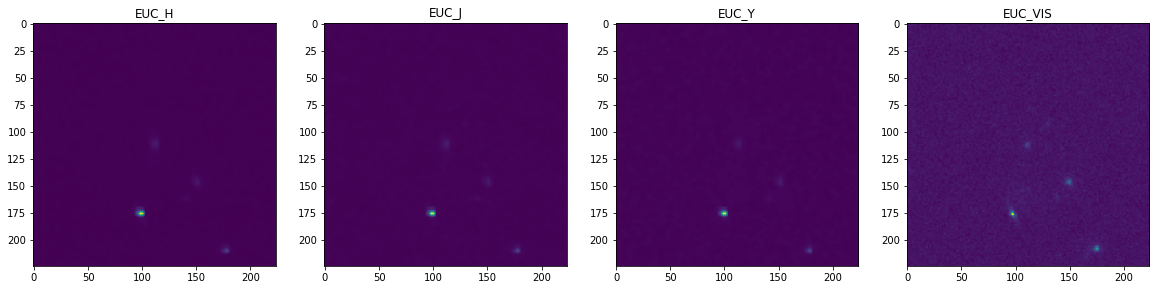

______
criteria (ground truth) 1.0
criteria prediction: 0.2261506


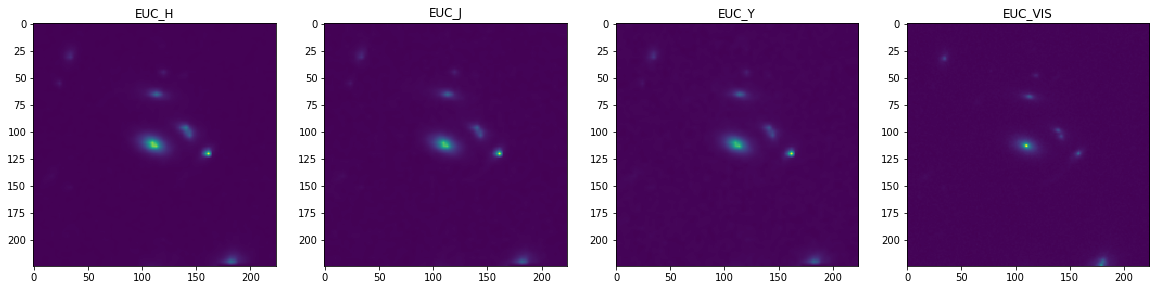

______
criteria (ground truth) 1.0
criteria prediction: 0.36358926


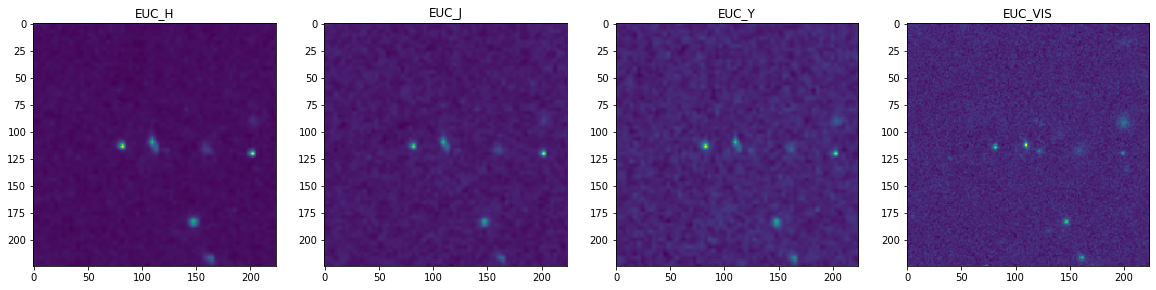

______
criteria (ground truth) 0.0
criteria prediction: 0.07820175


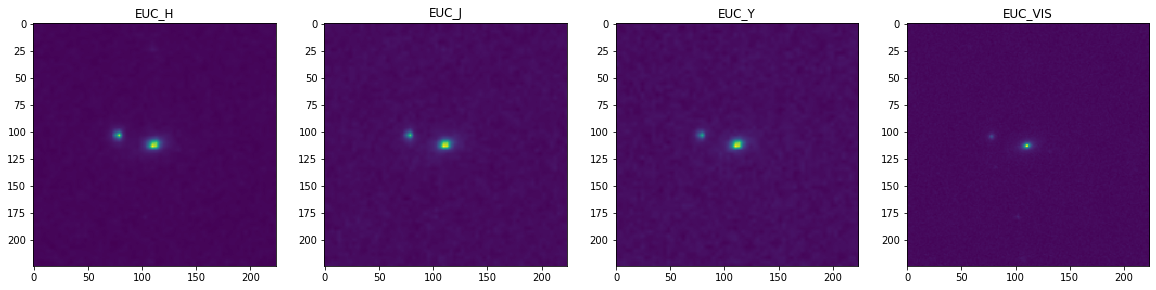

______
criteria (ground truth) 1.0
criteria prediction: 0.40131113


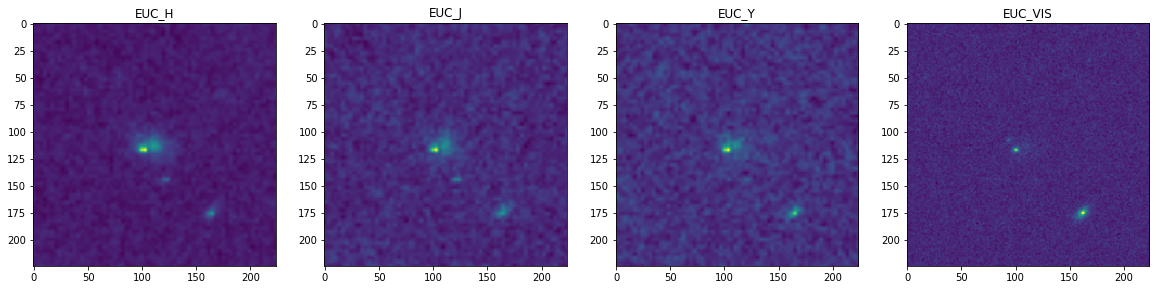

______
criteria (ground truth) 0.0469625
criteria prediction: 0.15599056


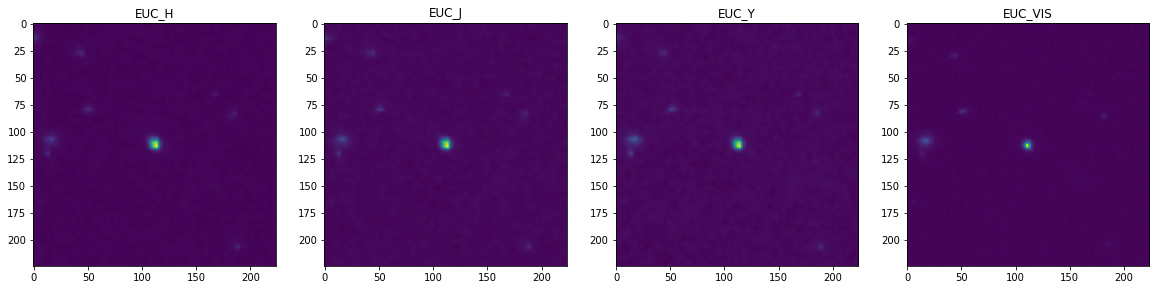

______
criteria (ground truth) 1.0
criteria prediction: 0.5388373


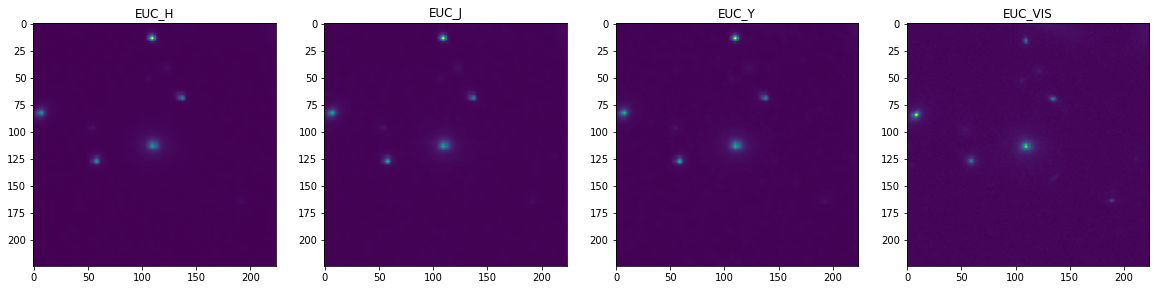

______
criteria (ground truth) 0.671375
criteria prediction: 0.42205507


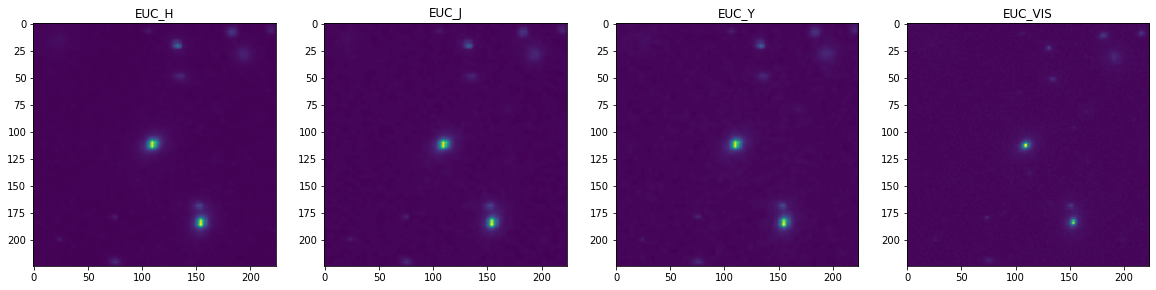

______


In [4]:
net.cuda()




for batch_idx, (data, ID, criteria, mag_eff) in enumerate(test_loader):
    data, target = data.float(), criteria.float()
    data, target = Variable(data).cuda(), Variable(target).cuda()
    data, target = data, target.unsqueeze(1)
    
    #print("n_source", n_sources)
   
    

    #img = scipy.ndimage.zoom(img, 1.4, order=1)
    #img = scipy.ndimage.zoom(img, 1.4, order=1)
    
    #print("criteria (ground truth)", target.cpu().numpy()[0][0])
    output = net(data)
    output = F.sigmoid(output)
    
    #print("criteria prediction:", output.data.cpu().numpy()[0][0])
    
    if output.data.cpu().numpy()[0][0] < 1.00:
    #if mag_eff[0] > 4.8:    
        print("criteria (ground truth)", target.cpu().numpy()[0][0])
        print("criteria prediction:", output.data.cpu().numpy()[0][0])
        
        image = np.zeros((4, 224, 224))
        channel_names = ['EUC_H', 'EUC_J', 'EUC_Y', 'EUC_VIS']
        plt.figure(figsize=(20, 5))
        for i, channel in enumerate(channel_names):
            filepath = root_folder + channel + "/image" + channel + "-" + str(ID.numpy()[0]) + ".fits"
            lens_data = fits.open(filepath)
            img = lens_data[0].data
            img_channel_0 = scipy.ndimage.zoom(img, 224/img.shape[0], order=1)
            image[i, :, :] += img_channel_0
            plt.subplot(1, 4, i+ 1)
            plt.imshow(image[i, :, :])
            plt.title(channel)
        plt.show()
    print("______")

    #print("flux tpye (prediction):", pred_flux_type)
    
    
    if batch_idx > 30:
        break

In [5]:
net.cuda()


criteria_target_list = []
criteria_output_list = []

for batch_idx, (data, ID, criteria, mag_eff) in enumerate(test_loader):
    data, target = data.float(), criteria.float()
    data, target = Variable(data).cuda(), Variable(target).cuda()
    data, target = data, target.unsqueeze(1)
    
    #print("n_source", n_sources)
   
    

    #img = scipy.ndimage.zoom(img, 1.4, order=1)
    #img = scipy.ndimage.zoom(img, 1.4, order=1)
    
    #print("criteria (ground truth)", target.cpu().numpy()[0][0])
    output = net(data)
    output = F.sigmoid(output)
    
    #print("criteria prediction:", output.data.cpu().numpy()[0][0])
    
    if output.data.cpu().numpy()[0][0] < 1.00:
    #if mag_eff[0] > 4.8:    
        #print("criteria (ground truth)", target.cpu().numpy()[0][0])
        #print("criteria prediction:", output.data.cpu().numpy()[0][0])
        criteria_target_list.append(target.cpu().numpy()[0][0])
        criteria_output_list.append(output.data.cpu().numpy()[0][0])
        

    #print("______")

    
    
    
    if batch_idx > 100:
        break

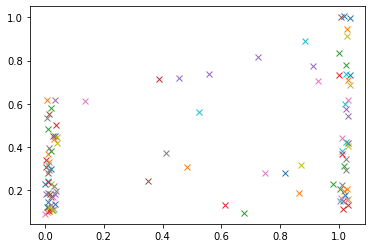

In [6]:
noise = 0.04 * np.random.rand(1, 102)
#print(noise)
plt.plot(np.array(criteria_target_list) + noise, np.array(criteria_output_list) + noise, "x")
plt.show()

In [7]:
def fbeta_score(y_true, y_pred, beta, threshold, eps=1e-9):
    beta2 = beta**2

    y_pred = torch.ge(y_pred.float(), threshold).float()
    y_true = y_true.float()

    true_positive = (y_pred * y_true).sum(dim=1)
    precision = true_positive.div(y_pred.sum(dim=1).add(eps))
    recall = true_positive.div(y_true.sum(dim=1).add(eps))

    return torch.mean(
        (precision*recall).
        div(precision.mul(beta2) + recall + eps).
        mul(1 + beta2))

In [13]:
py_pred = torch.from_numpy(np.array([criteria_output_list]))
py_true = torch.from_numpy(np.array([criteria_target_list]))
#py_pred = torch.from_numpy(np.array([0.9 * np.ones(102)]))

fbeta_score(py_true, py_pred, beta = 0.001, threshold=0.8)

tensor(0.8555)